# Tesla Stock Price Prediction using LSTM


###  1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### 2. Loading and Inspecting the Data

In [5]:
data = pd.read_csv('/content/TSLA.csv')

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


### 3. Data Preprocessing

#### Extracting the 'Close' price for prediction


In [7]:
# Extract the 'Close' price for prediction
close_price = data['Close'].values




#### Scaling the data

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

### 4. Creating Sequences

In [9]:
# Creating sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
       # Create a sequence of data from day 'i' to 'i + seq_length - 1'
        X.append(data.iloc[i:i + seq_length].values)

        # The target value is the stock price for the day immediately after the sequence
        y.append(data.iloc[i + seq_length]['Close'])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 20

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))


#### Splitting the data into training and testing sets

In [10]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8) # 1916 for train -- 480 for test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [11]:
print(y_test.shape)

(480,)


In [12]:
print(X_train.shape)  # This should output something like (number of samples, sequence length, number of features)


(1916, 20, 6)


#### Building the LSTM model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#### Training the model

In [14]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0157
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 8.1715e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 9.0308e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.2791e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.9825e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.3124e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.1831e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.1662e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.1450e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.3294e-04


### 6. Evaluating the Model

In [15]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0650e-04
Test Loss: 0.0016551712760701776


### 7. Visualizing the Results

##### "At the end of our predictions, we encountered difficulties because the stock prices were significantly affected by the COVID-19 pandemic, which caused unusual market conditions that our model was not able to predict accurately."



15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


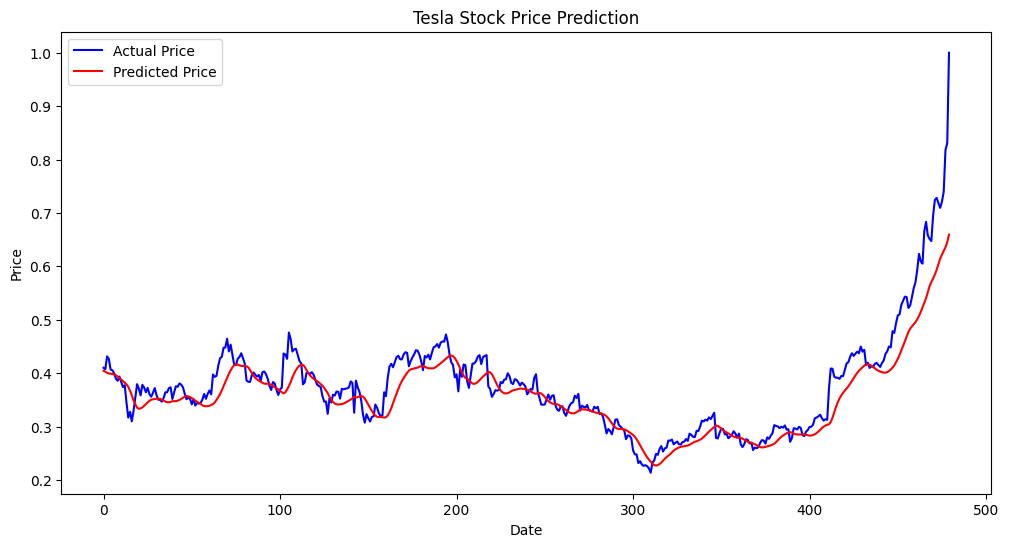

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(model.predict(X_test), label='Predicted Price', color='red')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()